In [ ]:
!pip install opencv-python
# !pip install opencv-contrib-python

In [1]:
import numpy as np
import cv2 as cv

In [2]:
len(dir(cv))

2049

## Getting Started with Videos


#### Source: [OpenCV: Getting Started with Videos](https://docs.opencv.org/4.5.2/dd/d43/tutorial_py_video_display.html)

In [3]:
cap = cv.VideoCapture(0)

# if not cap.isOpen():
#     cap.open()

while True:
    ret, frame = cap.read()

    cv.imshow('frame', frame)
    if cv.waitKey(1) & 0xFF == ord('q'): # Wait for 1ms and return the key pressed
        break

# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

In [4]:
cap = cv.VideoCapture('video.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    cv.imshow('frame',frame)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv.destroyAllWindows()


# Read and Modify Pixeel Values

In [5]:
im = cv.imread('image.jpg')

In [26]:
px = im[100, 100]
print(px)

blue = im[100, 100, 0]
print(blue)

[  0  81 146]
0


In [27]:
im[100,100] = [255,255,255]
print(im[100, 100])

[255 255 255]


# Accessing Image Properties


In [28]:
print(im.shape)

(319, 512, 3)


In [29]:
print(im.size)

489984


In [10]:
print(im.dtype)

uint8


# Image ROI

In [11]:
region = im[200:260, 330:390]
im[:60, 100:160] = region

In [12]:
cv.imshow('w', im)
cv.waitKey()
cv.destroyAllWindows()

# Splitting and Merging Image Channels


In [13]:
b,g,r = cv.split(im) # or b = im[:,:,0]
im = cv.merge((b,g,r))

In [14]:
# Make Red pixels all zero
im[:,:,2] = 0

# Arithmetic Operations on Images

#### Source: [OpenCV: Arithmetic Operations on Images](https://docs.opencv.org/4.5.2/d0/d86/tutorial_py_image_arithmetics.html)

## Image Addition

In [11]:
x = np.uint8([250])
y = np.uint8([10])

print(cv.add(x,y)) # 250+10 = 260 => 255

# Saturation
print(x+y)          # 250+10 = 260 % 256 = 4


[[255]]
[4]


## Image Blending
Image addition
 - Different weights are given to images in order to give a feeling of blending or transparency
 - Images are added as per the equation below:
<img src='f.png' style="height: 30px">
 -  `cv.addWeighted()` applies the following equation to the image:
 <img src='f1.png' style="height: 35px">

In [ ]:
# img1 = cv.imread('ml.png')
# img2 = cv.imread('opencv-logo.png')

dst = cv.addWeighted(img1,0.7,img2,0.3,0)
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

 <img src='p1.jpg' >

## Bitwise Operations

 - Bitwise AND, OR, NOT, and XOR operations


## Changing Color-space

More than 150 color-space conversion methods available

Most Widely used ones:
    COLOR_BGR2RGB
    COLOR_BGR2HSV
    COLOR_BGR2Gray
    

In [ ]:
# Load two images
#img1 = cv.imread('messi5.jpg')
#img2 = cv.imread('opencv-logo-white.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

<img src="p2.jpg">

In [15]:
import matplotlib.pyplot as plt

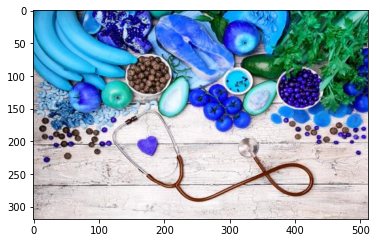

In [30]:
plt.imshow(im)

In [14]:
rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)

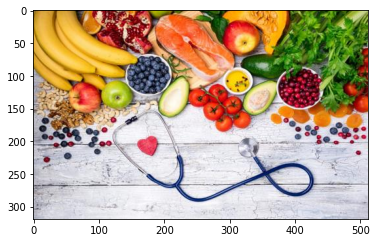

In [32]:
plt.imshow(rgb)

# Geometric Transformations of Images

### Apply diffrent geometric transformation
    - translation
    - rotation
    - affine transformation
    - etc.

In [19]:
# Resize
im1 = cv.resize(im, (100, 100))


cv.imshow('w', im1)
cv.waitKey()
cv.destroyAllWindows()

### Translation (shifting of an object's location)

The transformation matrix  M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}

In [ ]:
rows,cols = im.shape[:2]
M = np.float32([[1,0,100],[0,1,50]])

dst = cv.warpAffine(im,M,(cols,rows))

cv.imshow('w', dst)
cv.waitKey()
cv.destroyAllWindows()

### Rotation

Rotation of an image for an angle θ is achieved by the transformation matrix of the form

M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}

### scaled rotation with adjustable center of rotation

M = 
\begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix}

Where 

\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}

You can use ` cv.getRotationMatrix2D ` for constructing M

In [36]:
rows,cols = im.shape[:2]

M = cv.getRotationMatrix2D(((cols)/2.0,(rows-1)/2.0),90,1)


dst = cv.warpAffine(im,M,(cols,rows))

cv.imshow('w', dst)
cv.waitKey()
cv.destroyAllWindows()

# Affine Transformation

All parallel lines in the original image will still be parallel in the output image


### To find the transformation matrix we need:
    
1. Three points from the input image and their corresponding locations in the output image
2. The `cv.getAffineTransform`
    will create a 2x3 matrix
3. M willbe passed to `cv.warpAffine`.

#### Example on [OpenCV: Geometric Transformations of Images](https://docs.opencv.org/master/da/d6e/tutorial_py_geometric_transformations.html)


# Perspective Transformation
 - Need a 3x3 transformation matrix.
 - Straight lines will remain straight even after the transformation.

### To find this transformation matrix
 - Need 4 points on the input image and corresponding points on the output image.
 - Among these 4 points, 3 of them should not be collinear.
 - The transformation matrix can be found by the function `cv.getPerspectiveTransform`
 
 - Apply `cv.warpPerspective` with this 3x3 transformation matrix.

#### Example on [OpenCV: Geometric Transformations of Images](https://docs.opencv.org/master/da/d6e/tutorial_py_geometric_transformations.html)

In [ ]:
#cv.getAffineTransform
#cv.warpPerspective
#cv.getPerspectiveTransform

# GUI Features

## Trackbar as the Color Palette

#### Source: [OpenCV:Trackbar as the Color Palette](https://docs.opencv.org/4.5.2/d9/dc8/tutorial_py_trackbar.html)

In [8]:
def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)

cv.namedWindow('image')

# create trackbars for color change
cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)


while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == 27: # Esc
        break
    # get current positions of four trackbars
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv.destroyAllWindows()

## Drawing Functions in OpenCV
#### Source: [OpenCV:Drawing Functions in OpenCV](https://docs.opencv.org/4.5.2/dc/da5/tutorial_py_drawing_functions.html)

In [7]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
img = cv.line(img,(0,0),(511,511),(255,0,0),5)
img = cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
img = cv.circle(img,(447,63), 63, (0,0,255), -1)
img = cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv.polylines(img,[pts],True,(0,255,255))

font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)

cv.imshow('frame', img)
cv.waitKey()
cv.destroyAllWindows()

## Mouse as a Paint-Brush

Create a mouse callback function which is executed when a mouse event take place. 

#### Source: [OpenCV:Mouse as a Paint-Brush](https://docs.opencv.org/4.5.2/db/d5b/tutorial_py_mouse_handling.html)